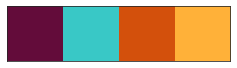

In [101]:
from sklearn import preprocessing
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import pandas as pd

import numpy as np
import os
import pandas as pd
# To make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

import seaborn as sns
#set style of plots
sns.set_style('white')

#define a custom palette
customPalette = ['#630C3A', '#39C8C6', '#D3500C', '#FFB139']
sns.set_palette(customPalette)
sns.palplot(customPalette)


# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [212]:
songs = pd.read_csv('indian_songs_audio_features.csv')
songs.columns

Index(['Unnamed: 0', 'acousticness', 'album', 'artist', 'danceability',
       'energy', 'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'track_name', 'valence'],
      dtype='object')

In [213]:
min_max_scaler = preprocessing.MinMaxScaler()
##Normalizing loudness
loudness = songs[['loudness']].values
loudness_scaled = min_max_scaler.fit_transform(loudness)

##Normalizing tempo
#tempo = songs[['tempo']].values
#tempo_scaled = min_max_scaler.fit_transform(tempo)

In [214]:
##Removing song name, artist name etc.
songs_features = songs.copy()
songs_features = songs_features.drop(['Unnamed: 0','track_name','artist','album','key','mode','instrumentalness','tempo','valence'],axis=1)

In [215]:
songs_features['loudness_scaled'] = loudness_scaled
#songs_features['tempo_scaled'] = tempo_scaled

In [216]:
songs_features = songs_features.drop(['loudness'],axis=1)

In [217]:
songs_features.columns

Index(['acousticness', 'danceability', 'energy', 'liveness', 'speechiness',
       'loudness_scaled'],
      dtype='object')

In [218]:
len(songs_features)

75

In [219]:
Sum_of_squared_distances = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(songs_features)
    Sum_of_squared_distances.append(km.inertia_)


array([[<AxesSubplot:title={'center':'acousticness'}>,
        <AxesSubplot:title={'center':'danceability'}>],
       [<AxesSubplot:title={'center':'energy'}>,
        <AxesSubplot:title={'center':'liveness'}>],
       [<AxesSubplot:title={'center':'speechiness'}>,
        <AxesSubplot:title={'center':'loudness_scaled'}>]], dtype=object)

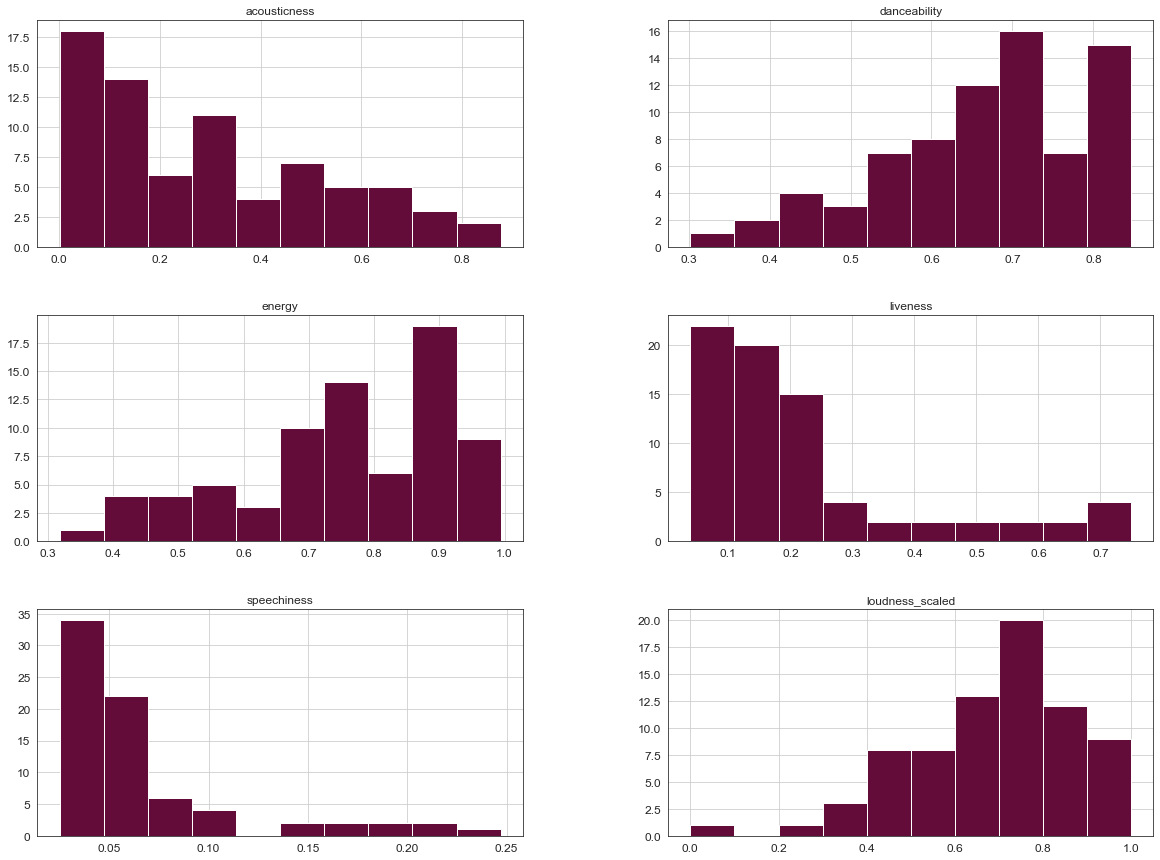

In [220]:
songs_features.hist(bins=10,figsize=(20,15))

In [221]:
for n_clusters in range(2,10):
    clusterer = KMeans (n_clusters=n_clusters)
    preds = clusterer.fit_predict(songs_features)
    centers = clusterer.cluster_centers_

    score = silhouette_score (songs_features, preds, metric='euclidean')
    print ("For n_clusters = {}, silhouette score is {})".format(n_clusters, score))

For n_clusters = 2, silhouette score is 0.37046865422793385)
For n_clusters = 3, silhouette score is 0.3486769003932191)
For n_clusters = 4, silhouette score is 0.3342358741522767)
For n_clusters = 5, silhouette score is 0.3001136959613615)
For n_clusters = 6, silhouette score is 0.21022034504219653)
For n_clusters = 7, silhouette score is 0.23232081648790473)
For n_clusters = 8, silhouette score is 0.22939828591176156)
For n_clusters = 9, silhouette score is 0.22496317133230917)


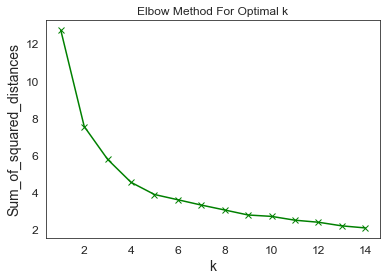

In [222]:
plt.plot(K, Sum_of_squared_distances, 'gx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [223]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(songs_features)

KMeans(n_clusters=3)

In [224]:
# PCA to reduce our data to 2 dimensions for visualisation
from sklearn.decomposition import PCA
y_kmeans = kmeans.predict(songs_features)
pca = PCA(n_components=2)
principal_components = pca.fit_transform(songs_features)

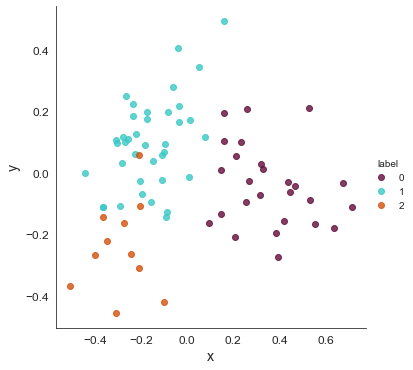

In [225]:
pc = pd.DataFrame(principal_components)
pc['label'] = y_kmeans
pc.columns = ['x', 'y','label']

#plot data with seaborn
cluster = sns.lmplot(data=pc, x='x', y='y', hue='label', 
                   fit_reg=False, legend=True, legend_out=True)

In [226]:
from sklearn.manifold import TSNE #T-Distributed Stochastic Neighbor Embedding
#T-SNE with two dimensions
tsne = TSNE(n_components=2, perplexity=50)

tsne_components = tsne.fit_transform(songs_features)

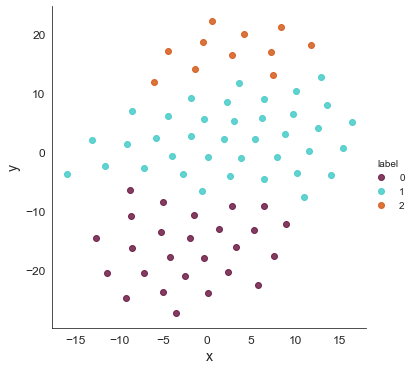

In [227]:
ts = pd.DataFrame(tsne_components)
ts['label'] = y_kmeans
ts.columns = ['x', 'y','label']

#plot data with seaborn
cluster = sns.lmplot(data=ts, x='x', y='y', hue='label', 
                   fit_reg=False, legend=True, legend_out=True)

In [228]:
pca.explained_variance_ratio_

array([0.53121772, 0.19759589])

In [229]:
# Dump components relations with features:
print (pd.DataFrame(pca.components_,columns=songs_features.columns,index = ['PC-1','PC-2']))

      acousticness  danceability    energy  liveness  speechiness  \
PC-1      0.696450     -0.257759 -0.464747 -0.221273    -0.038647   
PC-2     -0.501115      0.066986 -0.025522 -0.738139    -0.040822   

      loudness_scaled  
PC-1        -0.426699  
PC-2        -0.444105  


In [230]:
songs['label'] = y_kmeans

# shuffle dataset

songs = songs.sample(frac=1)
songs['label'].value_counts()

1    38
0    26
2    11
Name: label, dtype: int64

In [231]:
import csv

In [237]:
label_0 = songs[songs['label'] == 0].tail(38)

In [238]:
label_0.to_csv('indian_songs_label_.csv',encoding='utf-8')

In [75]:
songs[songs['label']==1].head(10)

,Unnamed: 0,acousticness,album,artist,danceability,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,track_name,valence,label
36,36,0.2660,R... Rajkumar (Original Motion Picture Soundtr...,Pritam,0.595,0.924,0.000000,0,0.0498,-4.183,1,0.1600,124.039,Saree Ke Fall Sa,0.864,1
59,59,0.0187,Bollywood Hotties,Various Artists,0.715,0.864,0.000000,11,0.7190,-5.013,0,0.0743,122.015,"Party On My Mind (From ""Race 2"")",0.568,1
49,49,0.1340,Zindagi Na Milegi Dobara,Shankar-Ehsaan-Loy,0.701,0.681,0.000000,9,0.0640,-6.442,1,0.0466,122.539,Senorita,0.810,1
58,58,0.2290,"Lat Lag Gayee (From ""Race 2"")",Benny Dayal,0.790,0.892,0.000001,10,0.2060,-4.038,0,0.0404,131.994,"Lat Lag Gayee (From ""Race 2"")",0.896,1
9,9,0.7850,Loveholic Arijit Singh,Arijit Singh,0.528,0.449,0.000000,5,0.1220,-6.250,0,0.0250,94.058,"Tum Hi Ho (From ""Aashiqui 2"")",0.317,1
69,69,0.0984,Baar Baar Dekho (Original Motion Picture Sound...,Various Artists,0.801,0.856,0.000066,0,0.2280,-4.233,1,0.0650,106.026,Kala Chashma,0.919,1
7,7,0.5050,Jab Tak Hai Jaan,A.R. Rahman,0.543,0.665,0.000006,9,0.1440,-8.295,1,0.0623,81.970,Saans,0.495,1
66,66,0.0775,Ra-One,Vishal-Shekhar,0.765,0.889,0.000014,0,0.1180,-3.530,0,0.0326,133.986,Chammak Challo (Muthada Chammak Challo),0.879,1
57,57,0.3050,Tees Maar Khan,Shirish Kunder,0.803,0.859,0.000062,6,0.5530,-4.405,0,0.1850,101.007,Sheila Ki Jawani,0.631,1
1,1,0.1130,Best of Arijit Singh,Arijit Singh,0.800,0.779,0.000000,4,0.2060,-5.515,0,0.0553,96.948,Nashe Si Chadh Gayi,0.266,1
